In [80]:
#import dataset
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import SCORERS
import numpy as np
import matplotlib.pyplot as plt

df_original=pd.read_csv('MedalTable.csv', sep=';')
df_original.head(10)

,Gold,Silver,Bronze,Total,Year,Home,Aux,Country,Year-1,Year-2,Year+1,GoldYear-1,TotalYear-1,GoldYear-2,TotalYear-2,HomeBefore,HomeAfter,FlagY1,FlagY2,TotalMedals
0,11,7,2,20,1896,0,16,USA,0,0,1900,0,0,0,0,0,0,0,0,122
1,10,17,19,46,1896,1,9,GRE,0,0,1900,0,0,0,0,0,0,0,0,122
2,6,5,2,13,1896,0,10,GER,0,0,1900,0,0,0,0,0,0,0,0,122
3,5,4,2,11,1896,0,9,FRA,0,0,1900,0,0,0,0,0,1,0,0,122
4,2,3,2,7,1896,0,16,GBR,0,0,1900,0,0,0,0,0,0,0,0,122
5,2,1,3,6,1896,0,10,HUN,0,0,1900,0,0,0,0,0,0,0,0,122
6,2,1,2,5,1896,0,10,AUT,0,0,1900,0,0,0,0,0,0,0,0,122
7,2,0,0,2,1896,0,12,AUS,0,0,1900,0,0,0,0,0,0,0,0,122
8,1,2,3,6,1896,0,10,DEN,0,0,1900,0,0,0,0,0,0,0,0,122
9,1,2,0,3,1896,0,14,SUI,0,0,1900,0,0,0,0,0,0,0,0,122


In [59]:
#Initial Cleaning
df=df_original[(df_original["FlagY1"]==1) & (df_original["FlagY2"]==1)]
df=df.drop(["Silver", "Bronze", "Aux", "Country", "Year-1", "Year-2", "Year+1","FlagY1", "FlagY2"], axis=1)

,Gold,Total,Year,Home,GoldYear-1,TotalYear-1,GoldYear-2,TotalYear-2,HomeBefore,HomeAfter,TotalMedals
32,78,239,1904,1,19,48,11,20,0,0,280
33,4,13,1904,0,4,9,6,13,0,0,280
36,2,4,1904,0,1,5,2,6,0,0,280
37,1,2,1904,0,16,32,2,7,0,1,280
38,1,2,1904,0,6,12,1,3,0,0,280
...,...,...,...,...,...,...,...,...,...,...,...
1239,0,1,2016,0,1,2,1,2,0,0,973
1240,0,1,2016,0,0,2,1,2,0,0,973
1241,0,1,2016,0,0,3,1,4,0,0,973
1242,0,1,2016,0,0,1,0,2,0,0,973


In [146]:
#separating validation set (2016) and train and test datasets for total medal prediction
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

df_validate=df_original[df_original["Year"]==2016][["Home", "TotalYear-1", "TotalYear-2","HomeBefore", "HomeAfter", "TotalMedals", "Total"]]
df=df[df["Year"]<2016]
X=df[["Home", "TotalYear-1", "TotalYear-2","HomeBefore", "HomeAfter", "TotalMedals"]]
y=df["Total"]

cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=8)

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)


Linear model has MSE = -178.02382736817668 
 and r2= 0.6920563391342067


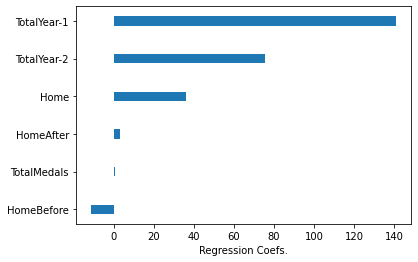

In [110]:
#training and evaluating linear regressor


linear = LinearRegression()
scoring='neg_mean_squared_error'
Mean_square_error_linear=model_selection.cross_val_score(linear, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_linear=model_selection.cross_val_score(linear, X_scaled, y, cv=cv, scoring=scoring)

print("Linear model has MSE =", Mean_square_error_linear.mean(), "\n and r2=", r2_linear.mean())

linear.fit(X_scaled, y)
importances=linear.coef_
indices = np.argsort(importances)
features=X.columns

x_plot=np.arange(len(indices))
width=0.25
plt.barh(x_plot, importances[indices], height=width)

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Regression Coefs.')

plt.show()


Linear model has MSE = -176.67539170012333 
 and r2= 0.6941022483082456


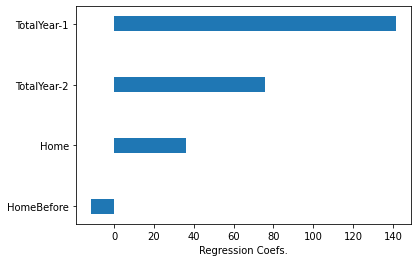

In [88]:
#Repeating removing HomeAfter and TotalMedals
f_validate=df[df["Year"]==2016]
df=df[df["Year"]<2016]
X=df[["Home", "TotalYear-1", "TotalYear-2","HomeBefore"]]
y=df["Total"]

cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=8)

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

linear = LinearRegression()
scoring='neg_mean_squared_error'
Mean_square_error_linear=model_selection.cross_val_score(linear, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_linear=model_selection.cross_val_score(linear, X_scaled, y, cv=cv, scoring=scoring)

print("Linear model has MSE =", Mean_square_error_linear.mean(), "\n and r2=", r2_linear.mean())

linear.fit(X_scaled, y)
importances=linear.coef_
indices = np.argsort(importances)
features=X.columns

x_plot=np.arange(len(indices))
width=0.25
plt.barh(x_plot, importances[indices], height=width)

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Regression Coefs.')

plt.show()


Linear model has MSE = -169.60972617990674 
 and r2= 0.7435140359674713


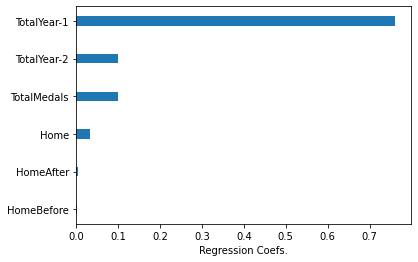

In [111]:
#training random forest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

#Repeating removing HomeAfter
df_validate=df[df["Year"]==2016]
df=df[df["Year"]<2016]
X=df[["Home", "TotalYear-1", "TotalYear-2","HomeBefore", "HomeAfter", "TotalMedals"]]
y=df["Total"]

cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=8)

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

scoring='neg_mean_squared_error'
Mean_square_error_forest=model_selection.cross_val_score(forest, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_forest=model_selection.cross_val_score(forest, X_scaled, y, cv=cv, scoring=scoring)

print("Linear model has MSE =", Mean_square_error_forest.mean(), "\n and r2=", r2_forest.mean())

forest.fit(X_scaled, y)
importances=forest.feature_importances_
indices = np.argsort(importances)
features=X.columns

x_plot=np.arange(len(indices))
width=0.25
plt.barh(x_plot, importances[indices], height=width)

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Regression Coefs.')

plt.show()


Linear model has MSE = -167.47557433140543 
 and r2= 0.7328430735479052


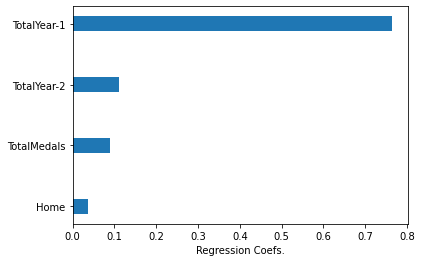

In [112]:
#Without home after and home before

f_validate=df[df["Year"]==2016]
df=df[df["Year"]<2016]
X=df[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
y=df["Total"]

cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=8)

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

linear = LinearRegression()
scoring='neg_mean_squared_error'
Mean_square_error_forest=model_selection.cross_val_score(forest, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_forest=model_selection.cross_val_score(forest, X_scaled, y, cv=cv, scoring=scoring)

print("Linear model has MSE =", Mean_square_error_forest.mean(), "\n and r2=", r2_forest.mean())

forest.fit(X_scaled, y)
importances=forest.feature_importances_
indices = np.argsort(importances)
features=X.columns

x_plot=np.arange(len(indices))
width=0.25
plt.barh(x_plot, importances[indices], height=width)

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Regression Coefs.')

plt.show()



In [116]:
#Trying gridsearch
from sklearn.model_selection import GridSearchCV

#parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 3, 4]}
parameters = {'n_estimators': [25, 50, 75, 100], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}

grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=5)
grid.fit(X_scaled, y)
print("Best Parameters:",grid.best_params_)
best_forest=grid.best_estimator_

scoring='neg_mean_squared_error'
Mean_square_error_forest=model_selection.cross_val_score(best_forest, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_forest=model_selection.cross_val_score(best_forest, X_scaled, y, cv=cv, scoring=scoring)

print("Best forest model has MSE =", Mean_square_error_forest.mean(), "\n and r2=", r2_forest.mean())

Best Parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 25}
Best forest model has MSE = -172.22903950022325 
 and r2= 0.7251535013652185


Linear model has MSE = -430.89593592746576 
 and r2= 0.27324959628172774


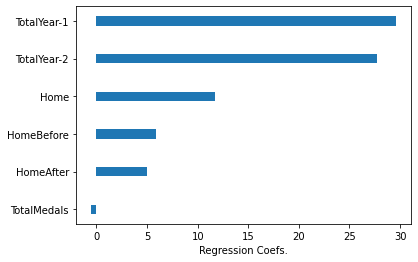

In [121]:
#Trying SVR
from sklearn.svm import SVR

svr = SVR(kernel="linear")

df_validate=df[df["Year"]==2016]
df=df[df["Year"]<2016]
X=df[["Home", "TotalYear-1", "TotalYear-2","HomeBefore", "HomeAfter", "TotalMedals"]]
y=df["Total"]

cv = model_selection.KFold(n_splits=10, shuffle=True, random_state=8)

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

scoring='neg_mean_squared_error'
Mean_square_error_svr=model_selection.cross_val_score(svr, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_svr=model_selection.cross_val_score(svr, X_scaled, y, cv=cv, scoring=scoring)

print("Linear model has MSE =", Mean_square_error_svr.mean(), "\n and r2=", r2_svr.mean())

svr.fit(X_scaled, y)
importances=svr.coef_[0,:]
indices = np.argsort(importances)
features=X.columns

x_plot=np.arange(len(indices))
width=0.25
plt.barh(x_plot, importances[indices], height=width)

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Regression Coefs.')

plt.show()


In [130]:
#grid search

parameters = {'kernel': ["linear", "rbf", "poly"], 'C': [1, 5, 10, 20, 50, 100], 'gamma': ["scale", "auto"]}

grid = GridSearchCV(estimator=SVR(), param_grid=parameters, cv=5)
grid.fit(X_scaled, y)
print("Best Parameters:",grid.best_params_)
best_svr=grid.best_estimator_

scoring='neg_mean_squared_error'
Mean_square_error_svr=model_selection.cross_val_score(best_svr, X_scaled, y, cv=cv, scoring=scoring)
scoring='r2'
r2_svr=model_selection.cross_val_score(best_svr, X_scaled, y, cv=cv, scoring=scoring)

print("Best SVR model has MSE =", Mean_square_error_svr.mean(), "\n and r2=", r2_svr.mean())

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVR model has MSE = -139.81743929937588 
 and r2= 0.787974885461962


In [160]:
#Ok, now we make Rio 2016 predictions, calculate R2 and check the top 10 (plus Brazil) results

from sklearn.metrics import r2_score

#Preparing x and y
X_linear=df[["Home", "TotalYear-1", "TotalYear-2","HomeBefore"]]
X_forest=df[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
X_svr=df[["Home", "TotalYear-1", "TotalYear-2", "HomeBefore", "HomeAfter", "TotalMedals"]]
y_fit=df["Total"]

X_linear_validate=df_validate[["Home", "TotalYear-1", "TotalYear-2","HomeBefore"]]
X_forest_validate=df_validate[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
X_svr_validate=df_validate[["Home", "TotalYear-1", "TotalYear-2", "HomeBefore", "HomeAfter", "TotalMedals"]]
y_validate=df_validate["Total"]

#normalizing
scaler = MinMaxScaler()
X_linear_scaled=scaler.fit_transform(X_linear)
X_linear_validate_scaled=scaler.transform(X_linear_validate)
X_forest_scaled=scaler.fit_transform(X_forest)
X_forest_validate_scaled=scaler.transform(X_forest_validate)
X_svr_scaled=scaler.fit_transform(X_svr)
X_svr_validate_scaled=scaler.transform(X_svr_validate)


#fitting, predicting and evaluating
linear=LinearRegression()
forest=RandomForestRegressor()
svr=SVR(C= 100, gamma='scale', kernel= 'rbf')

linear.fit(X_linear_scaled, y_fit)
forest.fit(X_forest_scaled, y_fit)
svr.fit(X_svr_scaled, y_fit)

y_linear=linear.predict(X_linear_validate_scaled)
y_forest=forest.predict(X_forest_validate_scaled)
y_svr=svr.predict(X_svr_validate_scaled)

df_validate["y_linear"]=y_linear
df_validate["y_forest"]=y_forest
df_validate["y_svr"]=y_svr
df_validate["y_median"]=df_validate[["y_linear", "y_forest", "y_svr"]].median(axis=0)
df_validate["Country"]=df_original[df_original["Year"]==2016]["Country"]

linear_score=r2_score(y_linear, y_validate)
forest_score=r2_score(y_forest, y_validate)
svr_score=r2_score(y_svr, y_validate)
#median_score=r2_score(df_validate["y_median"], y_validate)

print("Linear model r2:", linear_score, "\n Random Forest r2:", forest_score, "\n SVR r2:", svr_score, "\n Median r2:", )

#adding to df_validate and showing the top 20



df_validate.head(20)


Linear model r2: 0.8664873096676752 
 Random Forest r2: 0.8935016994656968 
 SVR r2: 0.8932733842181307 
 Median r2:


,Home,TotalYear-1,TotalYear-2,HomeBefore,HomeAfter,TotalMedals,Total,y_linear,y_forest,y_svr,Country,y_median
1161,0,104,112,0,0,973,121,99.040298,96.120000,99.238311,USA,NaN
1162,0,65,51,1,0,973,67,44.941577,71.900000,55.788548,GBR,NaN
1163,0,91,100,0,0,973,70,87.491474,95.950000,91.054520,CHN,NaN
1164,0,68,60,0,0,973,56,61.070894,81.950000,66.783118,RUS,NaN
1165,0,44,41,0,0,973,42,40.756177,36.960000,42.213346,GER,NaN
1166,0,38,25,0,0,973,41,32.088351,25.848333,32.690683,JPN,NaN
1167,0,35,43,0,0,973,42,36.049355,35.190000,35.921255,FRA,NaN
1168,0,30,32,0,0,973,21,29.570582,29.295000,28.914145,KOR,NaN
1169,0,28,27,0,0,973,28,26.787652,26.142500,25.999783,ITA,NaN
1170,0,35,46,0,0,973,29,37.006460,35.630000,36.819893,AUS,NaN


In [161]:
#Repeating removing home before and after

#Ok, now we make Rio 2016 predictions, calculate R2 and check the top 10 (plus Brazil) results

from sklearn.metrics import r2_score

#Preparing x and y
X_linear=df[["Home", "TotalYear-1", "TotalYear-2"]]
X_forest=df[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
X_svr=df[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
y_fit=df["Total"]

X_linear_validate=df_validate[["Home", "TotalYear-1", "TotalYear-2"]]
X_forest_validate=df_validate[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
X_svr_validate=df_validate[["Home", "TotalYear-1", "TotalYear-2", "TotalMedals"]]
y_validate=df_validate["Total"]

#normalizing
scaler = MinMaxScaler()
X_linear_scaled=scaler.fit_transform(X_linear)
X_linear_validate_scaled=scaler.transform(X_linear_validate)
X_forest_scaled=scaler.fit_transform(X_forest)
X_forest_validate_scaled=scaler.transform(X_forest_validate)
X_svr_scaled=scaler.fit_transform(X_svr)
X_svr_validate_scaled=scaler.transform(X_svr_validate)


#fitting, predicting and evaluating
linear=LinearRegression()
forest=RandomForestRegressor()
svr=SVR(C= 100, gamma='scale', kernel= 'rbf')

linear.fit(X_linear_scaled, y_fit)
forest.fit(X_forest_scaled, y_fit)
svr.fit(X_svr_scaled, y_fit)

y_linear=linear.predict(X_linear_validate_scaled)
y_forest=forest.predict(X_forest_validate_scaled)
y_svr=svr.predict(X_svr_validate_scaled)

df_validate["y_linear"]=y_linear
df_validate["y_forest"]=y_forest
df_validate["y_svr"]=y_svr
df_validate["y_median"]=df_validate[["y_linear", "y_forest", "y_svr"]].median(axis=0)
df_validate["Country"]=df_original[df_original["Year"]==2016]["Country"]

linear_score=r2_score(y_linear, y_validate)
forest_score=r2_score(y_forest, y_validate)
svr_score=r2_score(y_svr, y_validate)
#median_score=r2_score(df_validate["y_median"], y_validate)

print("Linear model r2:", linear_score, "\n Random Forest r2:", forest_score, "\n SVR r2:", svr_score, "\n Median r2:", )

#adding to df_validate and showing the top 20



df_validate.head(20)


Linear model r2: 0.8756019273277151 
 Random Forest r2: 0.9021953967540959 
 SVR r2: 0.9030449756841932 
 Median r2:


,Home,TotalYear-1,TotalYear-2,HomeBefore,HomeAfter,TotalMedals,Total,y_linear,y_forest,y_svr,Country,y_median
1161,0,104,112,0,0,973,121,97.076443,95.340000,100.302799,USA,NaN
1162,0,65,51,1,0,973,67,54.582320,72.070000,61.699048,GBR,NaN
1163,0,91,100,0,0,973,70,85.836770,90.690000,91.312636,CHN,NaN
1164,0,68,60,0,0,973,56,59.363117,77.290000,66.386782,RUS,NaN
1165,0,44,41,0,0,973,42,39.719965,36.440000,42.118271,GER,NaN
1166,0,38,25,0,0,973,41,30.860380,26.538333,33.130805,JPN,NaN
1167,0,35,43,0,0,973,42,35.556697,37.130000,35.568806,FRA,NaN
1168,0,30,32,0,0,973,21,28.992719,30.243333,28.826903,KOR,NaN
1169,0,28,27,0,0,973,28,26.156525,26.001667,26.041077,ITA,NaN
1170,0,35,46,0,0,973,29,36.609709,36.980000,36.377786,AUS,NaN


In [ ]:
#Adding the year-3 variable